Name : Shreyas Wankhede 

Roll no: AI21BTECH11028

ASSIGNMENT 3 

PROBLEM 2

PART a

In [114]:
import numpy as np
import random
import matplotlib.pyplot as plt

class TicTacToe:

    def __init__(self):
        self.opponent_type_X = 'X'
        self.PLAYER_O = 'O'
        self.initialize_board()
        self.q_table = {self.tuple_board: np.array([0.0 for _ in range(9)])}

    def initialize_board(self):
        self.board = [['_' for _ in range(3)] for _ in range(3)]
        self.tuple_board = tuple([tuple(row) for row in self.board])
        self.agent_moves = []
        self.opponent_moves = []
        self.empty_slots = [i for i in range(9)]

    def get_tuple_board(self):
        return tuple([tuple(row) for row in self.board])

    def make_move(self, position, player):
        if position in self.empty_slots:
            if player == "opponent":
                self.board[position // 3][position % 3] = self.PLAYER_O
                self.opponent_moves.append(position)
            else:
                self.board[position // 3][position % 3] = self.opponent_type_X
                self.agent_moves.append(position)
            self.empty_slots.remove(position)
            return position
        return None

    def is_game_over(self):
        return len(self.empty_slots) == 0

    def random_move(self):
        return random.choice(self.empty_slots)

    def safe_move(self):
        a = -1
        full_agent = self.agent_moves
        full_opponent = self.opponent_moves
        winning_combinations = [
            [0, 1, 2], [3, 4, 5], [6, 7, 8],  
            [0, 3, 6], [1, 4, 7], [2, 5, 8],  
            [0, 4, 8], [2, 4, 6]              
        ]

        a = -1

        # Check for agent's winning moves
        for combo in winning_combinations:
            if sum([1 for i in combo if i in self.agent_moves]) == 2:
                a = next(iter(set(combo) - set(self.agent_moves)))
                if a in self.empty_slots:
                    return a

        # Check for opponent's blocking moves if no winning move found
        for combo in winning_combinations:
            if sum([1 for i in combo if i in self.opponent_moves]) == 2:
                a = next(iter(set(combo) - set(self.opponent_moves)))
                if a in self.empty_slots:
                    return a

        # If no winning or blocking move found, choose a random move
        return random.choice(self.empty_slots)


    def is_winner(self, player):
        winning_combinations = [
        [0, 1, 2], [3, 4, 5], [6, 7, 8],  
        [0, 3, 6], [1, 4, 7], [2, 5, 8],  
        [0, 4, 8], [2, 4, 6]              
        ]
    
        if player == 'opponent':
          moves = self.opponent_moves
          symbol = self.PLAYER_O
        else:
          moves = self.agent_moves
          symbol = self.opponent_type_X

        for combo in winning_combinations:
           if all([self.board[i//3][i%3] == symbol for i in combo]):
            return True

        return False
 
    def update_q_table(self, original_state, action, reward, alpha, gamma):
        self.q_table[original_state][action] = (1 - alpha) * self.q_table[original_state][action] + alpha * (
                    reward + gamma * np.argmax(self.q_table[self.get_tuple_board()]))
        return

    def reset(self):
        self.initialize_board()


PART b

In [115]:


def opponent_play(game, player_type, alpha=0, gamma=0, update_q=True):
    initial_board_state = game.get_tuple_board()

    # Determine action based on player type
    if player_type == 'random':
        action = game.random_move()
    elif player_type == "choose":
        action = game.safe_move() if random.randint(0, 1) == 0 else game.random_move()
    else:
        action = game.safe_move()
    
    # Make the move
    game.make_move(action, 'opponent')

    # Add new board state to Q-table if not present
    new_board_state = game.get_tuple_board()
    if new_board_state not in game.q_table:
        game.q_table[new_board_state] = np.array([0.0 for _ in range(9)])

    # Set reward
    reward = -1 if game.is_winner("opponent") else 0

    # Update Q-table if required
    if update_q:
        game.update_q_table(initial_board_state, action, reward, alpha, gamma)

def agent_play(game, alpha=0, gamma=0, update_q=True):
    initial_board_state = game.get_tuple_board()
    
    # Get the best action based on the Q-values
    sorted_actions = np.argsort(game.q_table[initial_board_state])
    action_taken = None
    for action in sorted_actions:
        action_taken = game.make_move(action, "agent")
        if action_taken is not None:
            break

    # Add new board state to Q-table if not present
    new_board_state = game.get_tuple_board()
    if new_board_state not in game.q_table:
        game.q_table[new_board_state] = np.array([0.0 for _ in range(9)])

    # Set reward
    reward = 1 if game.is_winner("agent") else 0

    # Update Q-table if required
    if update_q:
        game.update_q_table(initial_board_state, action_taken, reward, alpha, gamma)


PART c


In [116]:


def train_agent(player, test_type, alpha, gamma):
    def play_turn(game, current_player, alpha, gamma, update):
        if current_player == "opponent":
            opponent_play(game, player, alpha, gamma, update)
            if game.is_winner("opponent"):
                return True
        else:
            agent_play(game, alpha, gamma, update)
            if game.is_winner("Agent"):
                return True
        return game.is_game_over()

    def play_full_game(game, start_player, alpha, gamma):
        current_player = start_player
        game_over = False

        while not game_over:
            game_over = play_turn(game, current_player, alpha, gamma, True)
            current_player = "Agent" if current_player == "opponent" else "opponent"
        game.reset()

    game = TicTacToe()
    agent_wins = []

    for n_game in range(10000):
        start_player = "opponent" if random.randint(0, 1) == 0 else "Agent"
        play_full_game(game, start_player, alpha, gamma)

        if n_game % 200 == 0 and n_game != 10000:
            test_result = test_agent(game, test_type, 100)[0]
            agent_wins.append(test_result)

    win, draw = test_agent(game, test_type, 1000)
    agent_wins.append(win / 10)
    print(f"win = {win}")
    print(f"draw = {draw}")
    print(f"lost = {1000 - win - draw}")
    
    return agent_wins



def test_agent(game, opponent_type, num_tests=100):
    agent_wins = 0
    draws = 0
    game.reset()

    for n_game in range(num_tests):
        start = random.randint(0,1)
        done = False
        
        if start == 0:
            while not done:
                if opponent_type == "random":
                    opponent_play(game , "random" , 0 ,0 , False)
                else:
                    opponent_play(game , "safe" , 0 ,0 , False)
                if game.is_winner("opponent"):
                    done = True
                if game.is_game_over():
                    done = True

                if not done:
                    agent_play(game , 0 ,0 , False)
                    if game.is_winner("Agent"):
                        done = True
                        agent_wins += 1
                    if game.is_game_over():
                        done = True
                        draws += 1

            game.reset()    

        else:
            while not done:
                
                agent_play(game , 0 ,0 , False)
                if game.is_winner("Agent"):
                    agent_wins += 1
                    done = True
                if game.is_game_over():
                    done = True

                if not done:
                    if opponent_type == "random":
                        opponent_play(game , "random" , 0 ,0 , False)
                    else:
                        opponent_play(game , "safe" , 0 ,0 , False)
                    if game.is_winner("opponent"):
                        done = True
                    if game.is_game_over():
                        done = True
                        draws += 1
                    
            game.reset() 

    return agent_wins, draws


win = 335
draw = 0
lost = 665


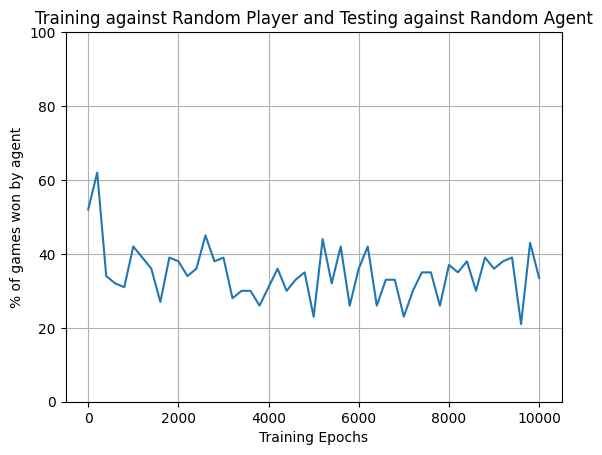

In [117]:

indices = [200 * i for i in range(51)]
ran = train_agent("random", "random", 0.6 , 0.4)
plt.plot(indices , ran)
plt.grid(True)
plt.ylim(0,100)
plt.title("Training against Random Player and Testing against Random Agent")
plt.xlabel("Training Epochs")
plt.ylabel("% of games won by agent")
plt.show()


win = 54
draw = 0
lost = 946


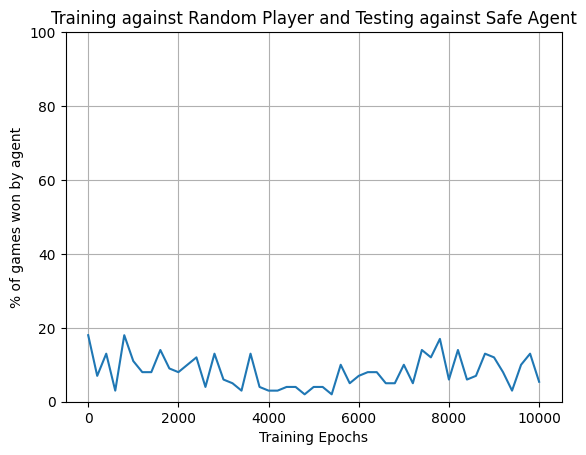

In [118]:

indices = [200 * i for i in range(51)]
ran = train_agent("random", "safe", 0.4 , 0.6)
plt.plot(indices , ran)
plt.ylim(0,100)
plt.grid(True)
plt.title("Training against Random Player and Testing against Safe Agent")
plt.xlabel("Training Epochs")
plt.ylabel("% of games won by agent")
plt.show()


win = 635
draw = 0
lost = 365


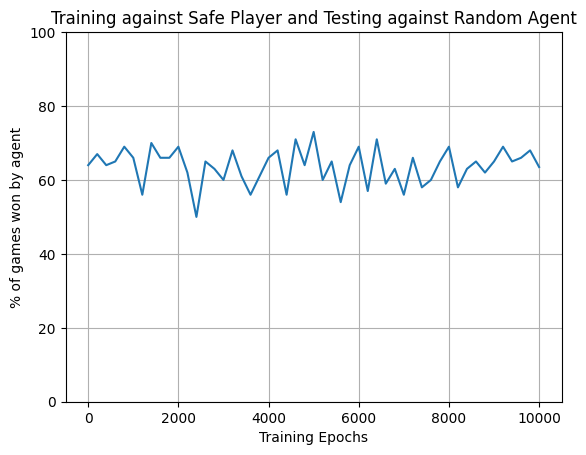

In [119]:
ran = train_agent("safe", "random", 0.6 , 0.4)
plt.plot(indices , ran)
plt.ylim(0,100)
plt.grid(True)
plt.title("Training against Safe Player and Testing against Random Agent")
plt.xlabel("Training Epochs")
plt.ylabel("% of games won by agent")
plt.show()

win = 3
draw = 0
lost = 997


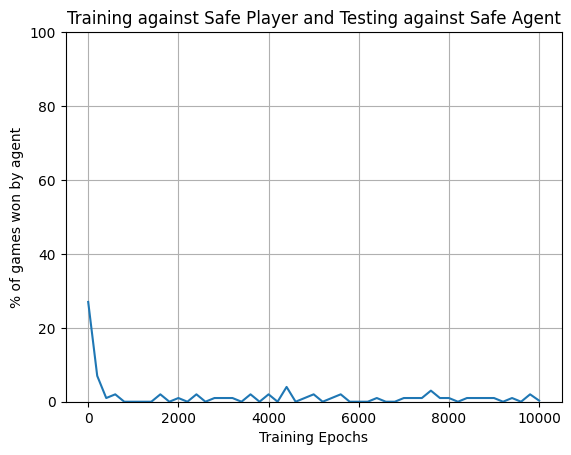

In [120]:
ran = train_agent("safe", "safe" , 0.6 , 0.4)
plt.plot(indices , ran)
plt.grid(True)
plt.ylim(0,100)
plt.title("Training against Safe Player and Testing against Safe Agent")
plt.xlabel("Training Epochs")
plt.ylabel("% of games won by agent")
plt.show()


win = 283
draw = 0
lost = 717


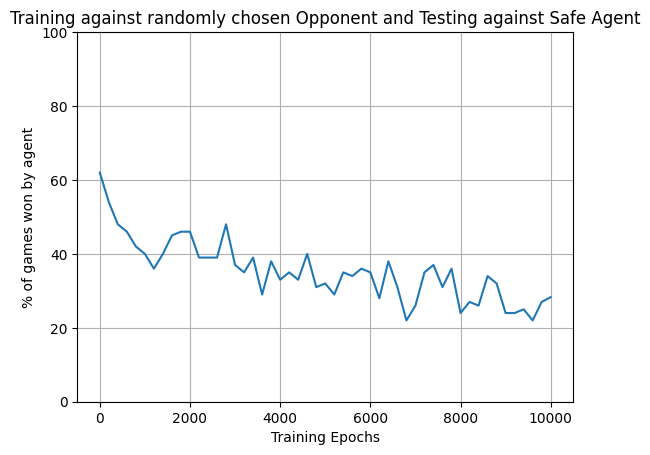

In [121]:
ran = train_agent("choose", "random", 0.6 , 0.4)
plt.plot(indices , ran)
plt.ylim(0,100)
plt.grid(True)
plt.title("Training against randomly chosen Opponent and Testing against Safe Agent")
plt.xlabel("Training Epochs")
plt.ylabel("% of games won by agent")
plt.show()

win = 57
draw = 0
lost = 943


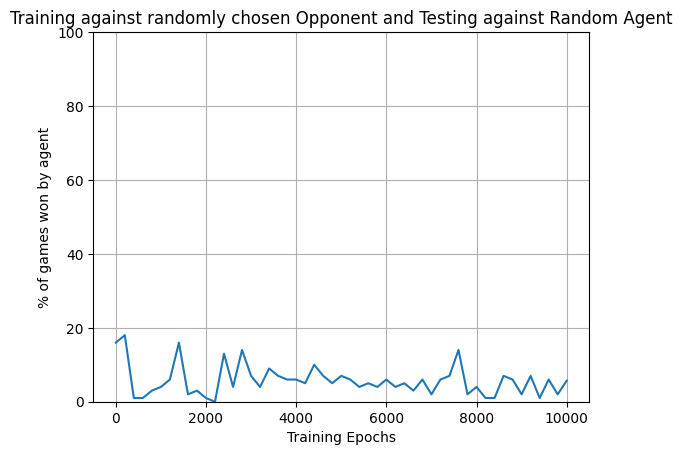

In [122]:
ran = train_agent("choose", "safe", 0.6 , 0.4)
plt.plot(indices , ran)
plt.grid(True)
plt.ylim(0,100)
plt.title("Training against randomly chosen Opponent and Testing against Random Agent")
plt.xlabel("Training Epochs")
plt.ylabel("% of games won by agent")
plt.show()

(d) Which agent is the best?

Answer:

The second agent should be the best becuase it is training against the safest player, which will win/block if there is an available move, else it will play randomly. Thus, training against the toughest opponent, should result in the best agent.

(e) Is the Q-learning agent developed unbeatable against any possible opponent ? If not,
suggest way to improve the training process

Answer:

The Q-learning agent developed for the Tic Tac Toe game, based on the code provided, is not guaranteed to be unbeatable against any possible opponent. The performance of this agent largely depends on its training and the strategies of its opponents. Some of the factors are its hyperparameters alpha and discount factor gamma.
Some of the ways to improvethe trainng process is :
1) Train agaist diverse opponents
2) Try different combinations of alpha and gamma.
3) Increase the number of iterations
4) Modify the reward structure to give intermediate rewards and penalties.